# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pharmaceutical_df = pd.merge(study_results, mouse_metadata, how="left")

# Display the data table for preview
pharmaceutical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_number = pharmaceutical_df["Mouse ID"].nunique()
mice_number

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Code suggested by Xpert Learning Assistant AI: 
duplicate_mice = pharmaceutical_df.groupby(["Mouse ID", "Timepoint"]).filter(lambda x: len(x) > 1)["Mouse ID"]
duplicate_mice.unique()


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
pharmaceutical_df.loc[pharmaceutical_df["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pharmaceutical_clean_df = pharmaceutical_df.drop(pharmaceutical_df[pharmaceutical_df["Mouse ID"] == 'g989'].index)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_number_clean = pharmaceutical_clean_df["Mouse ID"].nunique()
mice_number_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
pharmaceutical_grouped = pharmaceutical_clean_df.groupby(['Drug Regimen'])
regimen_means = pharmaceutical_grouped["Tumor Volume (mm3)"].mean()
regimen_medians = pharmaceutical_grouped["Tumor Volume (mm3)"].median()
regimen_variance = pharmaceutical_grouped["Tumor Volume (mm3)"].var()
regimen_SD = pharmaceutical_grouped["Tumor Volume (mm3)"].std()
regimen_SEM = pharmaceutical_grouped["Tumor Volume (mm3)"].sem()
pharmaceutical_summary = pd.DataFrame({'Mean Tumor Volume': regimen_means,
                                            'Median Tumor Volume': regimen_medians,
                                            'Tumor Volume Variance': regimen_variance,
                                            'Tumor Volume Std. Dev.': regimen_SD,
                                            'Tumor Volume Std. Err.': regimen_SEM} )
pharmaceutical_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
pd.DataFrame(pharmaceutical_grouped.agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']}))

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

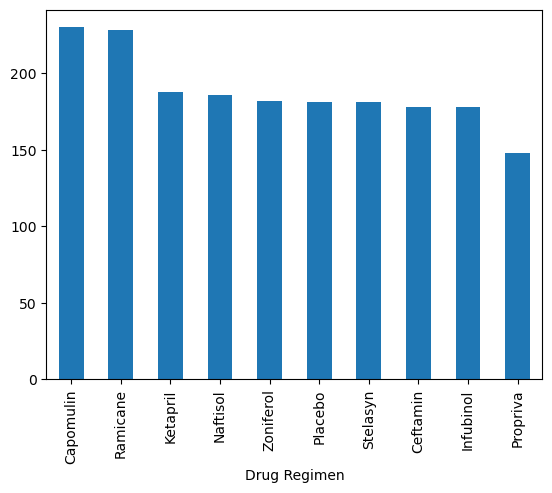

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = pharmaceutical_grouped["Mouse ID"].count().sort_values(ascending=False)
regimen_counts.plot.bar();


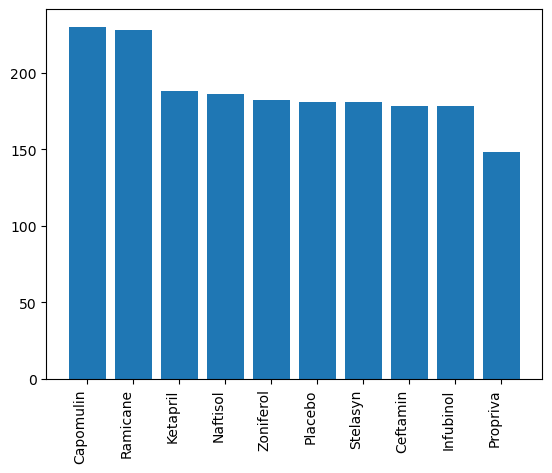

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(regimen_counts.index, regimen_counts.values)
plt.xticks(rotation= 90, ha='right');

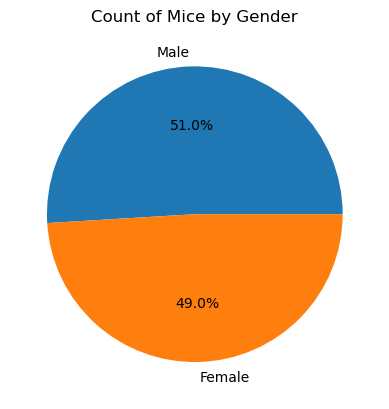

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pharmaceutical_clean_df["Sex"].value_counts().plot.pie(autopct="%1.1f%%", title="Count of Mice by Gender").set_ylabel("");

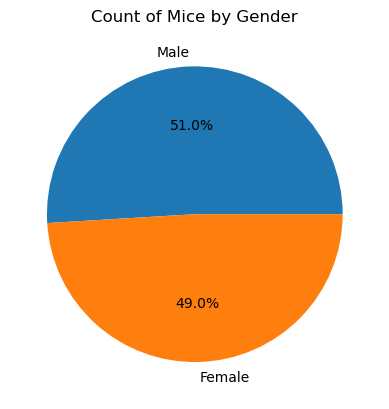

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x=pharmaceutical_clean_df["Sex"].value_counts()

plt.pie(x=x, autopct="%1.1f%%", labels=x.index)
plt.title("Count of Mice by Gender");


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
endpoint_mouse = pharmaceutical_clean_df.groupby("Mouse ID")[["Timepoint"]].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
pharmaceutical_maxtimes = pd.merge(pharmaceutical_clean_df, endpoint_mouse, on="Mouse ID", how="left")
pharmaceutical_maxtimes = pharmaceutical_maxtimes.loc[(pharmaceutical_maxtimes["Timepoint_x"] == pharmaceutical_maxtimes["Timepoint_y"]), ["Tumor Volume (mm3)", "Drug Regimen"]]
pharmaceutical_maxtimes

,Tumor Volume (mm3),Drug Regimen
1,45.000000,Ketapril
20,45.000000,Naftisol
53,45.000000,Ketapril
55,45.000000,Naftisol
108,45.000000,Stelasyn
...,...,...
1875,41.581521,Capomulin
1876,31.023923,Capomulin
1877,61.433892,Ceftamin
1878,58.634971,Placebo


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for regimen in regimens:
    regimen_vol = pharmaceutical_maxtimes.loc[(pharmaceutical_maxtimes["Drug Regimen"] == regimen), "Tumor Volume (mm3)"]
    # add subset 
    tumor_vol.append(regimen_vol) 

    #Determine outliers using upper and lower bounds
    quartiles = regimen_vol.quantile([.25, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = regimen_vol.loc[(regimen_vol < lower_bound) | (regimen_vol > upper_bound) ]
    print(f"{regimen}'s potential outliers: {outliers} \n")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 

Infubinol's potential outliers: 416    36.321346
Name: Tumor Volume (mm3), dtype: float64 

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 



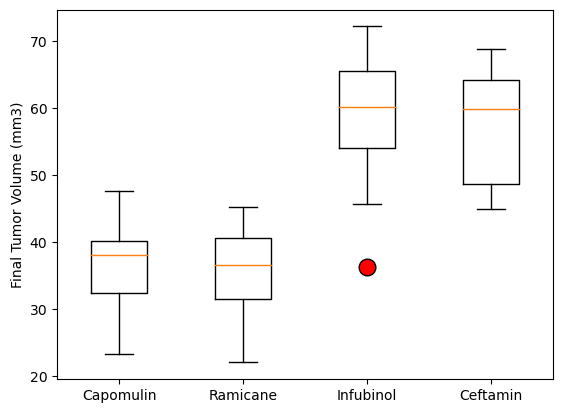

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol, labels = regimens, flierprops={'markerfacecolor': "red", 'markersize': "12"})

plt.show()

## Line and Scatter Plots

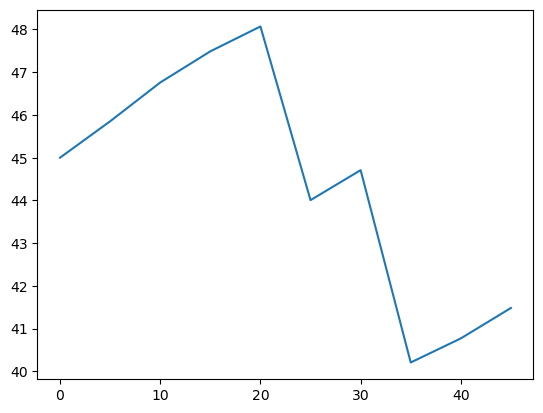

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_to_plot = pharmaceutical_clean_df.loc[pharmaceutical_clean_df["Mouse ID"] == 'l509', :]
plt.plot(mouse_to_plot['Timepoint'], mouse_to_plot["Tumor Volume (mm3)"])

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
